<a href="https://colab.research.google.com/github/marinasberg/Projeto-Analise-Dados-PrograMaria/blob/main/Analise_Dados_PrograMaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
import sqlite3
import seaborn as sns
import plotly.express as px

In [ ]:
# Montando o drive e lendo a planilha
from google.colab import drive
drive.mount('/content/drive')
dados = pd.read_excel("/content/drive/MyDrive/CursoPrograMaria/planilha_modulo3.xlsx")

Mounted at /content/drive


## Fazendo análise exploratória inicial

In [ ]:
# Visualizando as primeiras linhas da base de dados
dados.head()

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
3,3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,27.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,Setor Automotivo,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Sênior,de R$ 12.001/mês a R$ 16.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,15463.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0


In [ ]:
# Dimensão da base de dados com a função shape (quantidade de linhas e colunas, respectivamente)
dados.shape

(4271, 28)

In [ ]:
# Informações sobre o nome das colunas da tabela com a função columns
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'NIVEL', 'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO'],
      dtype='object')

In [ ]:
# Resumo dos dados com a função info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

In [ ]:
# Filtragem gênero feminino
dados[dados['GENERO']=='Feminino']

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.0,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 6 a 10,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Júnior,de R$ 2.001/mês a R$ 3.000/mês,Menos de 1 ano,Menos de 1 ano,2704.0
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,NaN,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,Não tive experiência na área de TI/Engenharia ...,10822.0
10,10,zwy34gktg0tfjq2ttjvazwy34gg3g49i,25.0,25-29,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Varejo,de 101 a 500,0.0,NaN,Analista de BI/BI Analyst,Júnior,de R$ 3.001/mês a R$ 4.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,3450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4248,4248,070o4zayoboztox764qu070o4zafbqrd,27.0,25-29,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 101 a 500,0.0,NaN,Cientista de Dados/Data Scientist,Pleno,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,4781.0
4251,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.0,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Finanças ou Bancos,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Pleno,de R$ 4.001/mês a R$ 6.000/mês,Menos de 1 ano,Menos de 1 ano,5673.0
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4259,4259,03n2lq8st9zobnowu3w03n2lqi0flz2w,28.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...","Relação com outros membros da empresa, em mome...",True,...,Finanças ou Bancos,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,24963.0


In [ ]:
# Filtragem de respostas 'Prefiro não informar'
dados[dados['GENERO'].str.contains('não', na=False)]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
562,562,vhuw8xnpbmj6oh20xovhuwcbdl4a12ni,29.0,25-29,Prefiro não informar,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1528,1528,n2ktdn33istvlu1ha4v3kn2ktdn1rsp1,NaN,55+,Prefiro não informar,Indígena,Prefiro não informar,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 51 a 100,0.0,NaN,Analista de Suporte/Analista Técnico,Júnior,Menos de R$ 1.000/mês,Menos de 1 ano,Menos de 1 ano,826.0
1913,1913,k3as6jdh3w4jf4ztsw4kpkk3as6jdy19,30.0,30-34,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Outra Opção,de 101 a 500,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,Mais de 10 anos,de 3 a 4 anos,11476.0
1925,1925,jzppdwep2kpisqjjzppdh304v83cj7eu,NaN,17-21,Prefiro não informar,Prefiro não informar,Prefiro não informar,"Sim, acredito que minha experiência profission...",Quantidade de oportunidades de emprego/vagas r...,False,...,Setor Farmaceutico,de 1 a 5,0.0,NaN,Outra Opção,Júnior,de R$ 2.001/mês a R$ 3.000/mês,de 1 a 2 anos,Menos de 1 ano,2294.0
2554,2554,f5l206z0hr9uh3nz2iiff5l206c0g10o,20.0,17-21,Prefiro não informar,Prefiro não informar,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,Cientista de Dados/Data Scientist,Júnior,de R$ 1.001/mês a R$ 2.000/mês,de 1 a 2 anos,de 1 a 2 anos,1339.0
3090,3090,a6ugmsw7s8hu5aa6uglio5apj74fam9o,26.0,25-29,Prefiro não informar,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,de 101 a 500,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Não tive experiência na área de TI/Engenharia ...,11545.0
3357,3357,7q0icczxn0l3a894cbx7q0icczjyud0n,29.0,25-29,Prefiro não informar,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 1.001 a 3.000,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Júnior,de R$ 6.001/mês a R$ 8.000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,6345.0
3493,3493,6m8haop6lxnaizpwij6m8haopiax98jg,25.0,25-29,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 3.001/mês a R$ 4.000/mês,de 3 a 4 anos,Menos de 1 ano,3900.0
3610,3610,5mloglozmr0r715mntaxbt6xy8b5olmb,30.0,30-34,Prefiro não informar,Branca,Não,"Sim, acredito que a minha a experiência profis...",Velocidade de progressão de carreira,True,...,Tecnologia/Fábrica de Software,de 101 a 500,0.0,NaN,Engenheiro de Dados/Arquiteto de Dados/Data En...,Sênior,de R$ 8.001/mês a R$ 12.000/mês,de 3 a 4 anos,Não tive experiência na área de TI/Engenharia ...,10174.0
4171,4171,0rksyxnqhn13nwytwi6y0rkssx6jmodf,26.0,25-29,Prefiro não informar,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Outra Opção,de 1.001 a 3.000,0.0,NaN,Analista de Dados/Data Analyst,Pleno,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,Menos de 1 ano,10517.0


In [ ]:
#Filtrando os dados pela idade
dados[dados['IDADE']>=30]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,Acima de 3.000,0.0,NaN,DBA/Administrador de Banco de Dados,Júnior,de R$ 8.001/mês a R$ 12.000/mês,de 1 a 2 anos,de 7 a 10 anos,11194.0
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,Outra Opção,Acima de 3.000,1.0,Supervisor/Coordenador,NaN,NaN,de R$ 4.001/mês a R$ 6.000/mês,de 3 a 4 anos,Menos de 1 ano,4695.0
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,Finanças ou Bancos,Acima de 3.000,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 12.001/mês a R$ 16.000/mês,de 3 a 4 anos,Mais de 10 anos,14202.0
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.0,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Setor Público,de 101 a 500,0.0,NaN,Desenvolvedor/ Engenheiro de Software/ Analist...,Pleno,de R$ 6.001/mês a R$ 8.000/mês,Não tenho experiência na área de dados,Mais de 10 anos,7733.0
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.0,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Educação,Acima de 3.000,0.0,NaN,Professor,Pleno,de R$ 2.001/mês a R$ 3.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,2336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4261,4261,02xomoejng6c9152kde02xomww412qpg,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4262,4262,02vlm03c29g3fcys8tj06102vlm0983h,31.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Tecnologia/Fábrica de Software,de 501 a 1.000,1.0,Team Leader/Tech Leader,NaN,NaN,de R$ 16.001/mês a R$ 20.000/mês,de 3 a 4 anos,de 3 a 4 anos,18402.0
4264,4264,028mfisr3mqazkn5n6swe028mt55nqzq,37.0,35-39,Masculino,Branca,Não,NaN,NaN,True,...,Tecnologia/Fábrica de Software,de 51 a 100,1.0,Gerente/Head,NaN,NaN,de R$ 20.001/mês a R$ 25.000/mês,de 3 a 4 anos,Mais de 10 anos,24543.0


In [ ]:
# Agrupando os dados de uma coluna com a função groupby e contando os valores únicos com a função nunique
dados.groupby('GENERO')['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12


In [ ]:
# Visualizando a contagem dos nulos no agrupamento de dados
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [ ]:
# Descobrindo a quantidade de pessoas do gênero feminino com 30 anos ou mais
dados[(dados['IDADE']>=30) & (dados['GENERO']=='Feminino')]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO_OPORTUNIDADES,AVG(Municipio_Status.Renda)
4,4,zzaf1m95yan929rb94wzzaf1mekhvhpg,46.000000,45-49,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,"Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL,False,True,0.572357
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.000000,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,"Remuneração/Salário, Benefícios, Plano de carr...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,Não utilizo nenhuma das linguagens listadas,True,False,0.559293
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.000000,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,"Remuneração/Salário, Propósito do trabalho e d...",Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,"SQL, JavaScript",True,False,0.722115
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,31.153517,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Flexibilidade de trabalho remoto,Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido com dias fixos de trabalho pres...,Vou procurar outra oportunidade no modelo híbr...,"Sim, ocorreram layoffs/demissões em massa na e...",Outra atuação,SQL,False,True,0.574805
14,14,zwez49k0jhdvfkfst4zwef137uuf4ivy,35.000000,35-39,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,...,"Propósito do trabalho e da empresa, Remuneraçã...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,Análise de Dados,SQL,False,False,0.716571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241,4239,0ainafcs1bvxmj0ainauhk3u91eybho6,30.000000,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,Buscando oportunidade na área de dados,NaN,NaN,NaN,0.722115
4242,4240,0a5xgxb1ljmuqn0un8a10a5xg4eufs2l,37.000000,35-39,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,Não ocorreram layoffs/demissões em massa na em...,Análise de Dados,Não utilizo nenhuma das linguagens listadas,True,False,0.577147
4249,4247,07qzabp4ujpe4oz81udmb07qzabp4h0t,34.000000,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,"Flexibilidade de trabalho remoto, Remuneração/...",Modelo 100% remoto,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,"Sim, ocorreram layoffs/demissões em massa na e...",Análise de Dados,"SQL, R, Python",False,True,0.559293
4253,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.000000,30-34,Feminino,Preta,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Oportunidade de aprendizado e trabalhar com re...,Modelo 100%

In [ ]:
# Descobrindo a quantidade de pessoas do gênero masculino com 30 anos ou mais
dados[(dados['IDADE']>=30) & (dados['GENERO']=='Masculino')]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO_OPORTUNIDADES,AVG(Municipio_Status.Renda)
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,False,False,0.863000
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,True,False,0.572357
2,2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,53.0,50-54,Masculino,Branca,Não,NaN,NaN,True,...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1,False,True,0.863000
8,8,zy4o5dk6iuxpdwgzy4o58xvd6ykwohrj,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,Plano de carreira e oportunidades de crescimen...,Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,"Sim, ocorreram layoffs/demissões em massa na e...",Análise de Dados,"SQL, Visual Basic/VBA",False,False,0.716571
11,11,zwvpu2ssr2cr6g2jyzwvpu2dl5nfwa1f,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,"Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Análise de Dados,"SQL, R, Python",False,True,0.722115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4259,4257,043snvbsxn3fuyfe043j5comuyu8g6ba,46.0,45-49,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Plano de carreira e oportunidades de crescimen...,Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,True,False,0.716571
4262,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,Buscando oportunidade na área de dados,NaN,NaN,NaN,0.546813
4263,4261,02xomoejng6c9152kde02xomww412qpg,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,Buscando oportunidade na área de dados,NaN,NaN,NaN,0.722115
4264,4262,02vlm03c29g3fcys8tj06102vlm0983h,31.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,False,True,0.716571


In [ ]:
# Utilizando o value counts para contar as ocorrências da coluna nível com um filtro de idade
dados[dados['IDADE']>=30]['NIVEL'].value_counts()

,count
NIVEL,
Sênior,591
Pleno,484
Júnior,311


In [ ]:
# Agrupando os filtros de idade e gênero para visualizar as ocorrências na coluna nível
dados[(dados['IDADE']>=30) & (dados['GENERO']=='Feminino')]['NIVEL'].value_counts()

,count
NIVEL,
Pleno,139
Sênior,123
Júnior,110


In [ ]:
# Refazendo o mesmo filtro mudando a condição do gênero para fazer comparações
dados[(dados['IDADE']>=30) & (dados['GENERO']=='Masculino')]['NIVEL'].value_counts()

,count
NIVEL,
Sênior,467
Pleno,344
Júnior,201


In [ ]:
# Avançando a análise para observar a faixa dos 30 anos de idade
dados.query("30 <= IDADE < 40 and GENERO == 'Feminino'")

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO_OPORTUNIDADES,AVG(Municipio_Status.Renda)
5,5,zz0nlhbd8oxyiyxzz0nlh7g4xkiaza5v,32.000000,30-34,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,"Remuneração/Salário, Benefícios, Plano de carr...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,Não utilizo nenhuma das linguagens listadas,True,False,0.559293
7,7,zyc0twzno2sm5or5ovoxzyc0twz0300d,31.000000,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,"Remuneração/Salário, Propósito do trabalho e d...",Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,"SQL, JavaScript",True,False,0.722115
9,9,zxc3d314cn1c2ovmzxc34ha7nkw1na3j,31.153517,55+,Feminino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Flexibilidade de trabalho remoto,Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido com dias fixos de trabalho pres...,Vou procurar outra oportunidade no modelo híbr...,"Sim, ocorreram layoffs/demissões em massa na e...",Outra atuação,SQL,False,True,0.574805
14,14,zwez49k0jhdvfkfst4zwef137uuf4ivy,35.000000,35-39,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Atenção dada pelas pessoas diante das minhas o...,True,...,"Propósito do trabalho e da empresa, Remuneraçã...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,Análise de Dados,SQL,False,False,0.716571
50,50,zoxilju9s35wft7htczoxilj0ixdllc3,30.000000,30-34,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,"Flexibilidade de trabalho remoto, Ambiente e c...",Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1,False,True,0.564423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4241,4239,0ainafcs1bvxmj0ainauhk3u91eybho6,30.000000,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,Buscando oportunidade na área de dados,NaN,NaN,NaN,0.722115
4242,4240,0a5xgxb1ljmuqn0un8a10a5xg4eufs2l,37.000000,35-39,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo 100% presencial,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,Não ocorreram layoffs/demissões em massa na em...,Análise de Dados,Não utilizo nenhuma das linguagens listadas,True,False,0.577147
4249,4247,07qzabp4ujpe4oz81udmb07qzabp4h0t,34.000000,30-34,Feminino,Branca,Não,Não acredito que minha experiência profissiona...,NaN,True,...,"Flexibilidade de trabalho remoto, Remuneração/...",Modelo 100% remoto,Modelo 100% remoto,Vou procurar outra oportunidade no modelo 100%...,"Sim, ocorreram layoffs/demissões em massa na e...",Análise de Dados,"SQL, R, Python",False,True,0.559293
4253,4251,068hhicrqggu068huq0l2ab3g7liagy8,34.000000,30-34,Feminino,Preta,Não,Não acredito que 

In [ ]:
dados.query("30 <= IDADE < 40 and GENERO == 'Masculino'")

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?,EM_BUSCA,ABERTO_OPORTUNIDADES,AVG(Municipio_Status.Renda)
0,0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL,False,False,0.863000
1,1,zzls2oftfn9law393oezzls2ofhvfpzd,32.0,30-34,Masculino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,True,False,0.572357
8,8,zy4o5dk6iuxpdwgzy4o58xvd6ykwohrj,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,Plano de carreira e oportunidades de crescimen...,Modelo 100% remoto,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,"Sim, ocorreram layoffs/demissões em massa na e...",Análise de Dados,"SQL, Visual Basic/VBA",False,False,0.716571
11,11,zwvpu2ssr2cr6g2jyzwvpu2dl5nfwa1f,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,"Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Análise de Dados,"SQL, R, Python",False,True,0.722115
12,12,zwr9hqcpg513kaopenzwr9hibaqmldto,31.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,Buscando oportunidade na área de dados,NaN,NaN,NaN,0.716571
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4257,4255,04h8nb8yf9chk3up9uoov404h8nb8wmt,30.0,30-34,Masculino,Preta,Não,"Sim, acredito que a minha a experiência profis...","Oportunidades de progressão de carreira, Veloc...",True,...,"Remuneração/Salário, Propósito do trabalho e d...",Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,False,True,0.716571
4262,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,Buscando oportunidade na área de dados,NaN,NaN,NaN,0.546813
4263,4261,02xomoejng6c9152kde02xomww412qpg,33.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,Buscando oportunidade na área de dados,NaN,NaN,NaN,0.722115
4264,4262,02vlm03c29g3fcys8tj06102vlm0983h,31.0,30-34,Masculino,Amarela,Não,Não acredito que minha experiência profissiona...,NaN,True,...,"Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN,False,True,0.716571


In [ ]:
# Filtrando o nível de senioridade por gênero
dados.query("30 <= IDADE < 40 and GENERO == 'Masculino'")['NOVO_NIVEL'].value_counts()

,count
NOVO_NIVEL,
Sênior,366
Pessoa Gestora,326
Pleno,293
Júnior,173


In [ ]:
dados.query("30 <= IDADE < 40 and GENERO == 'Feminino'")['NOVO_NIVEL'].value_counts()

,count
NOVO_NIVEL,
Pleno,118
Sênior,96
Júnior,93
Pessoa Gestora,68


In [ ]:
# Usando uma pivot table para analisar a quantidade de pessoas gestoras por gênero
pd.pivot_table(dados, values=['ID'], index=['GENERO'], columns=['GESTOR?'], aggfunc='count')

ID     
GESTOR?                0.0  1.0
GENERO                         
Feminino               754  132
Masculino             2212  578
Prefiro não informar     9    2

## Análises estatísticas básicas

In [ ]:
# Média das idades
dados['IDADE'].mean()

np.float64(31.169168453657374)

In [ ]:
# Mediana das idades
dados['IDADE'].median()

30.0

In [ ]:
# Moda das idades
dados['IDADE'].mode()

,IDADE
0,27.0


In [ ]:
# Desvio padrão (dispersão dos dados em relação à média)
dados['IDADE'].std()

6.902802832143141

In [ ]:
# Idade mínima registrada na base de dados
dados['IDADE'].min()

18.0

In [ ]:
# Idade máxima registrada
dados['IDADE'].max()

54.0

In [ ]:
# Repetindo essas análises com a coluna salário
dados['SALARIO'].mean()

np.float64(10969.26691932864)

In [ ]:
dados['SALARIO'].median()

7625.5

In [ ]:
dados['SALARIO'].mode()

,SALARIO
0,11159.0


In [ ]:
dados['SALARIO'].std()

19419.753188763436

In [ ]:
dados['SALARIO'].min()

35.0

In [ ]:
dados['SALARIO'].max()

485191.0

In [ ]:
# Fazendo um filtro para o gênero feminino e calculando a média
dados[dados['GENERO']=='Feminino']['IDADE'].mean()

np.float64(31.318051575931232)

In [ ]:
# Fazendo um filtro para o gênero masculino e calculando a média
dados[dados['GENERO']=='Masculino']['IDADE'].mean()

np.float64(31.147876077930373)

In [ ]:
# Calculando a média de salário do gênero feminino
dados[dados['GENERO']=='Feminino']['SALARIO'].mean()

np.float64(8673.22460496614)

In [ ]:
# Calculando a média de salário do gênero masculino
dados[dados['GENERO']=='Masculino']['SALARIO'].mean()

np.float64(11724.552688172043)

In [ ]:
# Calculando agora a mediana dos salários, pois os dados estão mais dispersos
dados[dados['GENERO']=='Feminino']['SALARIO'].median()

6831.0

In [ ]:
dados[dados['GENERO']=='Masculino']['SALARIO'].median()

7903.0

## Tratando valores faltantes

In [ ]:
# Retomando o resumo dos dados usado anteriormente para identificar valores nulos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4271 entries, 0 to 4270
Data columns (total 28 columns):
 #   Column                                                                                                                     Non-Null Count  Dtype  
---  ------                                                                                                                     --------------  -----  
 0   Unnamed: 0                                                                                                                 4271 non-null   int64  
 1   ID                                                                                                                         4271 non-null   object 
 2   IDADE                                                                                                                      4197 non-null   float64
 3   FAIXA IDADE                                                                                                                4271 

### Tratando a coluna de gênero

In [ ]:
# Para aparecer os valores nulos:
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,12
NaN,9


In [ ]:
# Preenchendo os nulos com uma opção que já existe:
dados['GENERO'] = dados['GENERO'].fillna("Prefiro não informar")

In [ ]:
# Visualizando os dados depois do preenchimento
dados.groupby('GENERO', dropna=False)['ID'].nunique()

,ID
GENERO,
Feminino,1055
Masculino,3194
Prefiro não informar,21


### Tratando a coluna de idade

In [ ]:
# Verificando a quantidade não preenchida (o true):
dados['IDADE'].isnull().value_counts()

,count
IDADE,
False,4197
True,74


In [ ]:
# Filtrar e verificar a faixa de idade que não preencheu (aqui, todas que não preencheram idade colocaram a faixa):
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,
55+,68
17-21,6


In [ ]:
# Calculando a média para substituir os dados da faixa 17-21 anos de idade
media_17_21 = dados[dados['FAIXA IDADE']=='17-21']['IDADE'].mean()

In [ ]:
# Filtrando e substituindo os dados
dados.loc[(dados['FAIXA IDADE']=='17-21') & (dados['IDADE'].isnull()), 'IDADE'] = media_17_21

In [ ]:
# Repetindo o processo para a faixa de 55+
dados[dados['FAIXA IDADE']=='55+']['IDADE']

,IDADE
9,NaN
66,NaN
96,NaN
121,NaN
156,NaN
...,...
4001,NaN
4043,NaN
4048,NaN
4061,NaN


In [ ]:
# Calculando uma média geral para substituir os valores nulos da faixa 55+
media_geral = dados['IDADE'].mean()
media_geral

np.float64(31.153517220250375)

In [ ]:
dados.loc[(dados['FAIXA IDADE']=='55+') & (dados['IDADE'].isnull()), 'IDADE'] = media_geral

In [ ]:
# Conferindo se os dados foram preenchidos corretamente
dados[dados['IDADE'].isnull()]['FAIXA IDADE'].value_counts()

,count
FAIXA IDADE,


### Tratando a coluna de salário

In [ ]:
# Verificando a quantidade de valores nulos na coluna salário
dados[dados['SALARIO'].isnull()]

,Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,...,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO
12,12,zwr9hqcpg513kaopenzwr9hibaqmldto,31.0,30-34,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,28,ztgepgj82o9oix0nztgepq2trcay6gpv,24.0,22-24,Feminino,Parda,Não,"Sim, acredito que a minha a experiência profis...",Aprovação em processos seletivos/entrevistas,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,34,zsa9i6njd3e594mw0tvlk4zsa9iw86i9,24.0,22-24,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Quantidade de oportunidades de emprego/vagas r...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,39,zr4b2vm7dapp3linwqwn7zr4b2vmagqx,32.0,30-34,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,63,zm7o5yquakof0j6zm7vh3o0letznhdvh,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4242,4242,09oxwp6lsdwhw09ox1uobuxa8cq2pzma,26.0,25-29,Masculino,Branca,Não,NaN,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4252,4252,064pe9b1htw7mflhif064pe95dotv6yf,39.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4258,4258,03zjgijmnwv9qrlzbr03zjgij1eae1hw,25.0,25-29,Feminino,Branca,Não,"Sim, acredito que a minha a experiência profis...",Senioridade das vagas recebidas em relação à s...,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4260,4260,03atvow8404tatt2iixjds03atvownkz,36.0,35-39,Masculino,Parda,Não,Não acredito que minha experiência profissiona...,NaN,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Verificando que os nulos na coluna salário também deixaram a faixa salarial em branco:
dados[dados['SALARIO'].isnull()]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


In [ ]:
# Substituindo os valores faltantes pela mediana (menos afetada por outliers)
mediana_salario = dados['SALARIO'].median()

In [ ]:
dados.loc[dados['SALARIO'].isnull(), 'SALARIO'] = mediana_salario

In [ ]:
# Conferindo o preenchimento dos dados
dados[dados['SALARIO'].isnull()].value_counts()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,count
Unnamed: 0,ID,IDADE,FAIXA IDADE,GENERO,COR/RACA/ETNIA,PCD,EXPERIENCIA_PROFISSIONAL_PREJUDICADA,ASPECTOS_PREJUDICADOS,VIVE_NO_BRASIL,ESTADO ONDE MORA,UF ONDE MORA,REGIAO ONDE MORA,MUDOU DE ESTADO?,REGIAO DE ORIGEM,NIVEL DE ENSINO,ÁREA DE FORMAÇÃO,QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,SETOR,NUMERO DE FUNCIONARIOS,GESTOR?,CARGO COMO GESTOR,CARGO ATUAL,NIVEL,FAIXA SALARIAL,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?,SALARIO,


### Valores discrepantes (outliers)

{'whiskers': [<matplotlib.lines.Line2D at 0x7d4a6e99dbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7d4a6e98c310>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d4a6e9a75d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d4a6e98e010>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d4a6e98e050>],
 'means': []}

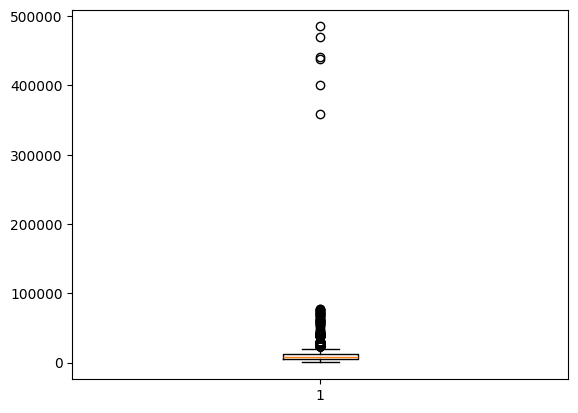

In [ ]:
# Utilizando o boxplot para identificar outliers na coluna de salário
plt.boxplot(dados['SALARIO'])

In [ ]:
# Calculando os quartis dos salários:
Q1 = dados['SALARIO'].quantile(0.25)
Q1

np.float64(4751.5)

In [ ]:
Q3 = dados ['SALARIO'].quantile(0.75)
Q3

np.float64(11794.5)

In [ ]:
# Calculando o intervalo interquartil
IQR = Q3 - Q1
IQR

np.float64(7043.0)

In [ ]:
lim_superior = Q3 + (1.5*IQR)
lim_superior

np.float64(22359.0)

In [ ]:
lim_inferior = Q1 - (1.5*IQR)
lim_inferior

np.float64(-5813.0)

In [ ]:
dados['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
de R$ 8.001/mês a R$ 12.000/mês,752
de R$ 4.001/mês a R$ 6.000/mês,584
de R$ 6.001/mês a R$ 8.000/mês,527
de R$ 12.001/mês a R$ 16.000/mês,437
de R$ 3.001/mês a R$ 4.000/mês,303
de R$ 2.001/mês a R$ 3.000/mês,285
de R$ 16.001/mês a R$ 20.000/mês,229
de R$ 1.001/mês a R$ 2.000/mês,216
de R$ 20.001/mês a R$ 25.000/mês,134


In [ ]:
# Cálculo a partir da média e desvio padrão, pois o boxplot não expressou bem a realidade dos dados
media_salario = dados['SALARIO'].mean()
media_salario

np.float64(10517.53348162023)

In [ ]:
desvio_salario = dados['SALARIO'].std()
desvio_salario

18096.210989118474

In [ ]:
# Definindo um limite superior para identificar os outliers
limite_superior = media_salario + (3*desvio_salario)
limite_superior

np.float64(64806.16644897565)

In [ ]:
# Contando os valores que estão acima do limite superior
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19
de R$ 30.001/mês a R$ 40.000/mês,3


In [ ]:
# Calculando a média dessa faixa sem os outliers
media_30_40 = dados[(dados['FAIXA SALARIAL']=='de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO']<limite_superior)]['SALARIO'].mean()

In [ ]:
# Substituindo os outliers dessa faixa salarial pela média calculada
dados.loc[(dados['FAIXA SALARIAL']=='de R$ 30.001/mês a R$ 40.000/mês') & (dados['SALARIO']>limite_superior), 'SALARIO'] = media_30_40

In [ ]:
# Conferindo se ainda existem outliers nessa faixa salarial
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,
Acima de R$ 40.001/mês,19


In [ ]:
# Repetindo o processo para a faixa salarial restante
media_acima_40 = dados[(dados['FAIXA SALARIAL']=='Acima de R$ 40.001/mês') & (dados['SALARIO']<limite_superior)]['SALARIO'].mean()
media_acima_40

np.float64(53127.846153846156)

In [ ]:
dados.loc[(dados['FAIXA SALARIAL']=='Acima de R$ 40.001/mês') & (dados['SALARIO']>limite_superior), 'SALARIO'] = media_acima_40

In [ ]:
dados[dados['SALARIO']>limite_superior]['FAIXA SALARIAL'].value_counts()

,count
FAIXA SALARIAL,


{'whiskers': [<matplotlib.lines.Line2D at 0x7d4a6e69ee50>,
 'caps': [<matplotlib.lines.Line2D at 0x7d4a6e652350>,
 'boxes': [<matplotlib.lines.Line2D at 0x7d4a6e69c7d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7d4a6e651f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7d4a6e653b90>],
 'means': []}

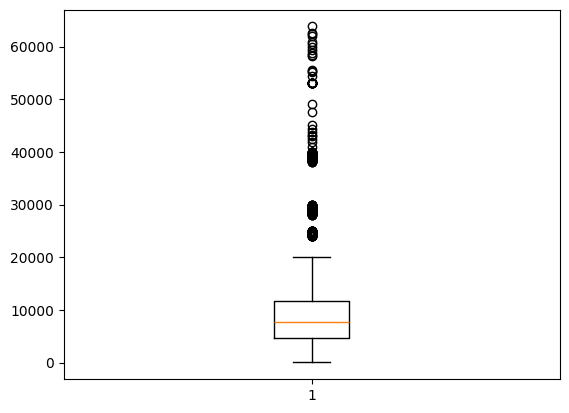

In [ ]:
# Visualizando o boxplot após os cálculos
plt.boxplot(dados['SALARIO'])

## Distribuição amostral e intervalo de confiança

In [ ]:
salarios = dados['SALARIO']
salarios

,SALARIO
0,11194.0
1,4695.0
2,14202.0
3,15463.0
4,7733.0
...,...
4266,4329.0
4267,3758.0
4268,19607.0
4269,989.0


In [ ]:
# Utilizando a biblioteca numpy
media_amostral = np.mean(salarios)
media_amostral

np.float64(9904.390109813306)

In [ ]:
desvio_amostral = np.std(salarios)
desvio_amostral

8306.104872579343

In [ ]:
nivel_confianca = 0.95

In [ ]:
tamanho_amostra = len(salarios)
tamanho_amostra

4271

In [ ]:
# Usando a biblioteca scipy para entender a precisão da média amostral calculando o erro padrão
erro_padrao = stats.sem(salarios)
erro_padrao

np.float64(127.11109872023638)

In [ ]:
# Cálculo do intervalo de confiança
intervalo_confianca = stats.t.interval(nivel_confianca, tamanho_amostra-1, loc=media_amostral, scale=erro_padrao)
intervalo_confianca

(np.float64(9655.186295869078), np.float64(10153.593923757535))

## Featuring engineering

In [ ]:
# Função para evidenciar as pessoas gestoras
def preencher_nivel(gestor,nivel):
  if gestor==1:
    return "Pessoa Gestora"
  else:
    return nivel

In [ ]:
# Criando a nova coluna a partir da função anterior
dados['NOVO_NIVEL'] = dados.apply(lambda x: preencher_nivel(x['GESTOR?'], x['NIVEL']), axis=1)

In [ ]:
# Visualizando a nova coluna
dados['NOVO_NIVEL'].value_counts()

,count
NOVO_NIVEL,
Pleno,1060
Júnior,1023
Sênior,898
Pessoa Gestora,713


In [ ]:
# Conversão de variáveis categóricas
dados = pd.get_dummies(dados, columns=['NIVEL'])

In [ ]:
# Repetindo o processo para criar uma coluna de geração
def determinar_geracao(idade):
  if 39<idade<=58:
    return "Geração X"
  elif 29<idade<=39:
    return "Millenial"
  elif 13<idade<=29:
    return "Geração Z"
  else:
    return "Outra geração"

In [ ]:
dados['GERACAO'] = dados['IDADE'].apply(determinar_geracao)

In [ ]:
dados['GERACAO'].value_counts()

,count
GERACAO,
Geração Z,1999
Millenial,1761
Geração X,511


In [ ]:
# Incluindo mais uma tabela na análise
dados2 = pd.read_excel('/content/drive/MyDrive/CursoPrograMaria/Cópia de Planilha_Aula_parte2.xlsx')

In [ ]:
# Visualizando início da tabela
dados2.head()

,ID,Quanto tempo de experiência na área de dados você tem?,Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?,Você está satisfeito na sua empresa atual?,Qual o principal motivo da sua insatisfação com a empresa atual?,Você participou de entrevistas de emprego nos últimos 6 meses?,Você pretende mudar de emprego nos próximos 6 meses?,Quais os principais critérios que você leva em consideração no momento de decidir onde trabalhar?,Atualmente qual a sua forma de trabalho?,Qual a forma de trabalho ideal para você?,Caso sua empresa decida pelo modelo 100% presencial qual será sua atitude?,Sua empresa passu por Layoff em 2022?,Atuacao,Quais das linguagens listadas abaixo você utiliza no trabalho?
0,zzqzz3l9ily8nuo2m7wyzzqzz3w48o96,de 1 a 2 anos,de 7 a 10 anos,True,NaN,Não participei de entrevistas de emprego/proce...,Não estou buscando e não pretendo mudar de emp...,Benefícios,Modelo 100% presencial,Modelo híbrido com dias fixos de trabalho pres...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Engenharia de Dados,SQL
1,zzls2oftfn9law393oezzls2ofhvfpzd,de 3 a 4 anos,Menos de 1 ano,False,Falta de oportunidade de crescimento no empreg...,"Sim, fiz entrevistas mas não fui aprovado",Estou em busca de oportunidades dentro ou fora...,"Remuneração/Salário, Plano de carreira e oport...",Modelo 100% presencial,Modelo híbrido flexível (o funcionário tem lib...,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Gestor,NaN
2,zzdwqzfqqp1ypc7ps6m0hzzdwqz292yi,de 3 a 4 anos,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido com dias fixos de trabalho pres...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,1
3,zzbqh3uy7yk7k9qmkzzbqtb4s9faqspl,de 4 a 6 anos,Não tive experiência na área de TI/Engenharia ...,True,NaN,"Sim, fui aprovado e mudei de emprego","Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Flexibilidade de trabalho...",Modelo híbrido flexível (o funcionário tem lib...,Modelo híbrido flexível (o funcionário tem lib...,Vou procurar outra oportunidade no modelo híbr...,Não ocorreram layoffs/demissões em massa na em...,desenvolve modelos preditivos e algoritmos de...,0
4,zzaf1m95yan929rb94wzzaf1mekhvhpg,Não tenho experiência na área de dados,Mais de 10 anos,False,Falta de oportunidade de crescimento no empreg...,Não participei de entrevistas de emprego/proce...,"Não estou buscando, mas me considero aberto a ...","Remuneração/Salário, Oportunidade de aprendiza...",Modelo 100% presencial,Modelo 100% presencial,Vou aceitar e retornar ao modelo 100% presencial,Não ocorreram layoffs/demissões em massa na em...,Outra atuação,SQL


In [ ]:
# Juntando tabelas utilizando o merge
dados = dados.merge(dados2, on='ID', how='left')

In [ ]:
# Verificando a junção das tabelas
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satis

In [ ]:
# Criando mais duas colunas novas a partir da pergunta sobre mudança de emprego
dados['Você pretende mudar de emprego nos próximos 6 meses?'].value_counts()

,count
Você pretende mudar de emprego nos próximos 6 meses?,
"Não estou buscando, mas me considero aberto a outras oportunidades",1354
Estou em busca de oportunidades dentro ou fora do Brasil,1011
Não estou buscando e não pretendo mudar de emprego nos próximos 6 meses,978
"Estou em busca de oportunidades, mas apenas fora do Brasil",353


In [ ]:
# Utilizando funções de string para categorizar as respostas
dados['EM_BUSCA'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('em busca', case=False)

In [ ]:
dados['EM_BUSCA'].value_counts()

,count
EM_BUSCA,
False,2332
True,1364


In [ ]:
dados['ABERTO_OPORTUNIDADES'] = dados['Você pretende mudar de emprego nos próximos 6 meses?'].str.contains('aberto', case=False)

In [ ]:
dados['ABERTO_OPORTUNIDADES'].value_counts()

,count
ABERTO_OPORTUNIDADES,
False,2342
True,1354


## Correlação

In [ ]:
# Analisando a correlação entre variáveis com o coeficiente de Pearson
correlacao_continua = dados ['IDADE'].corr(dados['SALARIO'])
correlacao_continua

np.float64(0.2902441968622099)

In [ ]:
# Análise de variáveis categóricas usando o coeficiente de Cramer
tabela_cruzada = pd.crosstab(dados['COR/RACA/ETNIA'], dados['NIVEL DE ENSINO'])
tabela_cruzada

NIVEL DE ENSINO,Doutorado ou Phd,Estudante de Graduação,Graduação/Bacharelado,Mestrado,Não tenho graduação formal,Prefiro não informar,Pós-graduação
COR/RACA/ETNIA,,,,,,,
Amarela,7,15,50,14,2,0,40
Branca,127,365,999,355,65,8,827
Indígena,0,2,4,2,0,0,3
Outra,0,0,6,3,1,0,7
Parda,50,178,333,113,33,3,344
Prefiro não informar,1,2,14,1,0,1,7
Preta,6,51,104,33,9,0,88


In [ ]:
def cramer_coeficiente(coluna1, coluna2):
  tabela_cruzada = np.array(pd.crosstab(coluna1, coluna2))
  chi2 = chi2_contingency(tabela_cruzada)[0]
  soma = np.sum(tabela_cruzada)
  mini = min(tabela_cruzada.shape)-1
  cramer = np.sqrt(chi2/(soma*mini))
  return cramer

In [ ]:
cramer_coeficiente(dados['COR/RACA/ETNIA'], dados['NIVEL DE ENSINO'])

np.float64(0.04499106580480143)

In [ ]:
cramer_coeficiente(dados['GENERO'], dados['NIVEL DE ENSINO'])

np.float64(0.076119232802818)

In [ ]:
# Salvando a planilha com os dados tratados
dados.to_csv('/content/drive/MyDrive/CursoPrograMaria/analise_dados_final.csv', index=False)

## Conectando SQL com Pandas

In [ ]:
# Conectando com o banco de dados
conexao = sqlite3.connect('/content/drive/MyDrive/CursoPrograMaria/status_brasil')

In [ ]:
# Exemplificando uma query simples com o banco de dados escolhido
query = "SELECT * FROM Municipios_Brasileiros WHERE Cidade='Itaquaquecetuba';"
query

"SELECT * FROM Municipios_Brasileiros WHERE Cidade='Itaquaquecetuba';"

In [ ]:
pd.read_sql(query, con=conexao)

,Cidade,Estado,Regiao,municipio_ID
0,Itaquaquecetuba,SP,Sudeste,5043


In [ ]:
# Utilizando a planilha inicial com os dados tratados
dados = pd.read_csv('/content/drive/MyDrive/CursoPrograMaria/analise_dados_final.csv')

In [ ]:
# Criando uma lista dos estados
lista_estados = list(dados['UF ONDE MORA'].unique())

In [ ]:
# Consulta SQL para calcular a renda média de cada estado e juntar duas tabelas
query = '''SELECT Municipios_Brasileiros.Estado, AVG(Municipio_Status.Renda) FROM Municipios_Brasileiros
        INNER JOIN Municipio_Status ON Municipios_Brasileiros.municipio_ID = Municipio_Status.municipio_ID
        WHERE Municipios_Brasileiros.Estado IN ({})
        GROUP BY Municipios_Brasileiros.Estado;'''.format(','.join(['?' for _ in lista_estados]))
query

'SELECT Municipios_Brasileiros.Estado, AVG(Municipio_Status.Renda) FROM Municipios_Brasileiros\n        INNER JOIN Municipio_Status ON Municipios_Brasileiros.municipio_ID = Municipio_Status.municipio_ID\n        WHERE Municipios_Brasileiros.Estado IN (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)\n        GROUP BY Municipios_Brasileiros.Estado;'

In [ ]:
# Executando a consulta SQL
estados_renda = pd.read_sql(query, con=conexao, params=lista_estados)

In [ ]:
# Renomeando uma coluna do dataframe 'dados'
dados.rename(columns={'UF ONDE MORA': 'Estado'}, inplace=True)

In [ ]:
# Juntando as infos de renda extraídas na consulta no dataframe principal
dados = dados.merge(estados_renda, on="Estado", how='left')

In [ ]:
# Visualização do merge
dados.columns

Index(['Unnamed: 0', 'ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA',
       'PCD', 'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'Estado', 'REGIAO ONDE MORA',
       'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM', 'NIVEL DE ENSINO',
       'ÁREA DE FORMAÇÃO', 'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GERACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [ ]:
# Calculando a correlação entre salário e renda média do Estado
correlacao_renda_salario = dados ['SALARIO'].corr(dados['AVG(Municipio_Status.Renda)'])
correlacao_renda_salario

np.float64(0.12083384881429463)

In [ ]:
# Salvando as mudanças na planilha
dados.to_csv('/content/drive/MyDrive/CursoPrograMaria/analise_dados_final.csv', index=False)

## Visualização de dados

In [ ]:
genero_contagem = dados['GENERO'].value_counts()

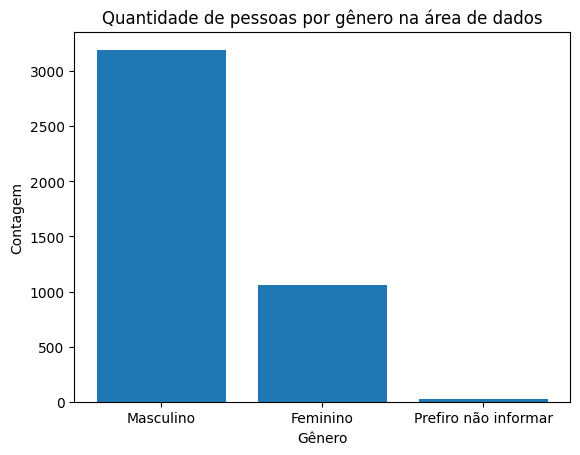

In [ ]:
# Criando um gráfico de barras com as informações de gênero
plt.figure()
plt.bar(height = genero_contagem.values, x = genero_contagem.index)
plt.title('Quantidade de pessoas por gênero na área de dados')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.show()

<ipython-input-113-6ae169dd7ddb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = dados, x = 'GENERO', palette = 'pastel')


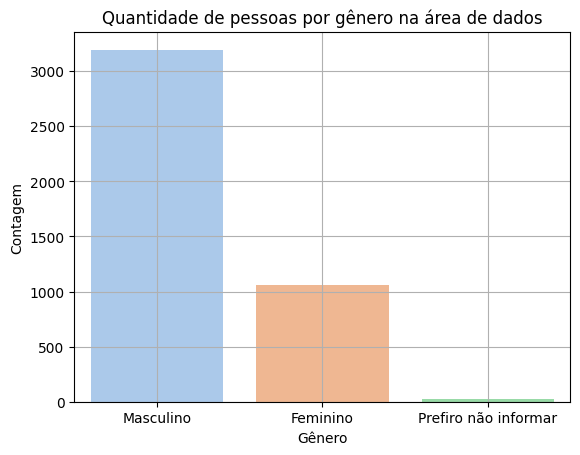

In [ ]:
# Fazendo o gráfico com a biblioteca seaborn
plt.figure()
sns.countplot(data = dados, x = 'GENERO', palette = 'pastel')
plt.title('Quantidade de pessoas por gênero na área de dados')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.grid(True)
plt.show()

In [ ]:
salario_por_idade = dados.groupby('IDADE')['SALARIO'].mean()

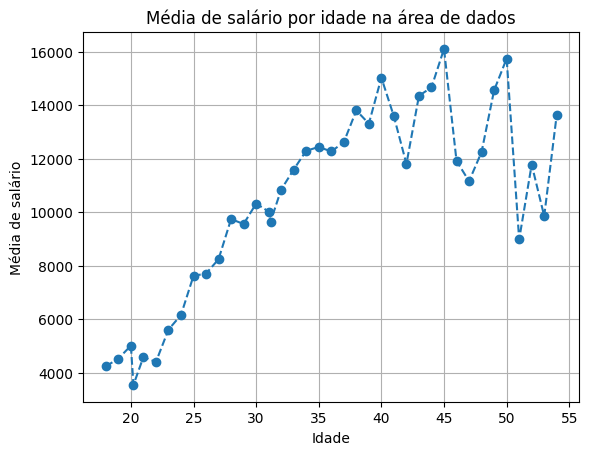

In [ ]:
# Relação entre salário e idade em um gráfico de linha
plt.figure()
plt.plot(salario_por_idade.index, salario_por_idade.values, marker='o', linestyle='--')
plt.xlabel('Idade')
plt.ylabel('Média de salário')
plt.title('Média de salário por idade na área de dados')
plt.grid(True)
plt.show()

In [ ]:
# Criando o gráfico de linha com a biblioteca plotly:
fig = px.line(salario_por_idade.reset_index(), x='IDADE', y='SALARIO', title='Média de salário por idade na área de dados',markers=True)
fig.show()

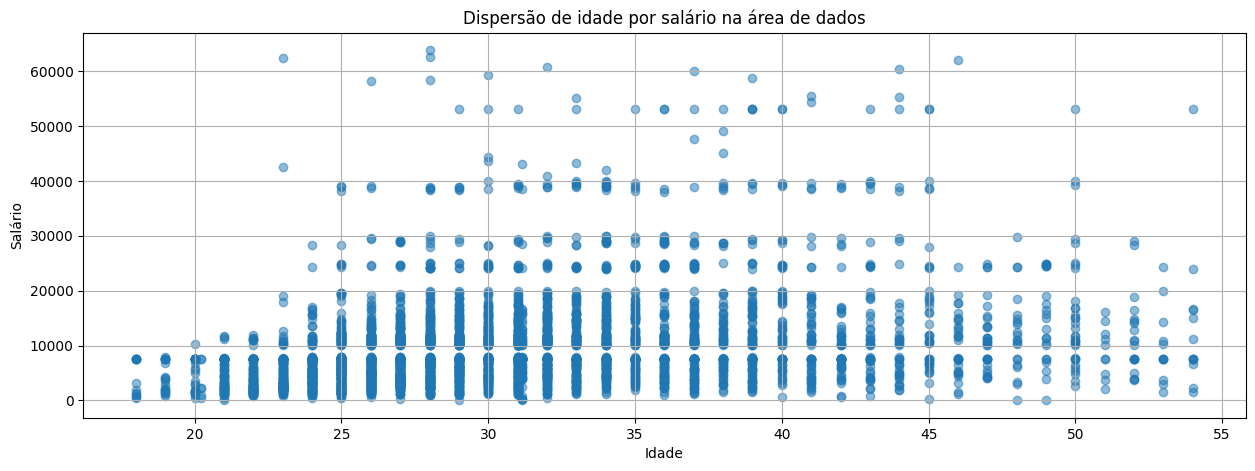

In [ ]:
# Visualização da relação entre salário e idade em scatterplot
plt.figure(figsize=(15,5))
plt.scatter(dados['IDADE'], dados['SALARIO'], alpha=0.5)
plt.xlabel('Idade')
plt.ylabel('Salário')
plt.title('Dispersão de idade por salário na área de dados')
plt.grid(True)
plt.show()

In [ ]:
fig = px.scatter(dados, x='IDADE', y='SALARIO', title='Dispersão de idade por salário na área de dados')
fig.show()